<a href="https://colab.research.google.com/github/cescudero27/4220-Data-Mining-Machine-Learning/blob/main/Escudero_Lab2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset-1:** This part of the lab will use a dataset that represents student admission into University based on Exam-1 and Exam-2 test scores. The dataset is uploaded in iLearn as Dataset-1. You need to upload it to your Google Colab. This represents linearly separable data.  

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

**Step-2: Load the Data:** The next step is to load the data. In this lab, the dataset is saved as .txt file (previous lab the data was saved as .csv file). Here, we will implement a function that helps us to load the data.

In [ ]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

Now, let's load the data for this problem.

In [ ]:
data = loaddata('Lab2_Dataset_1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


*Process the data:* Let's separate our X (features) and Y (labels) parts of the data.

In [ ]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

*Plot the data:* We will implement a function to help us with the scatter plot.

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

Let's plot the data by calling our plot function.

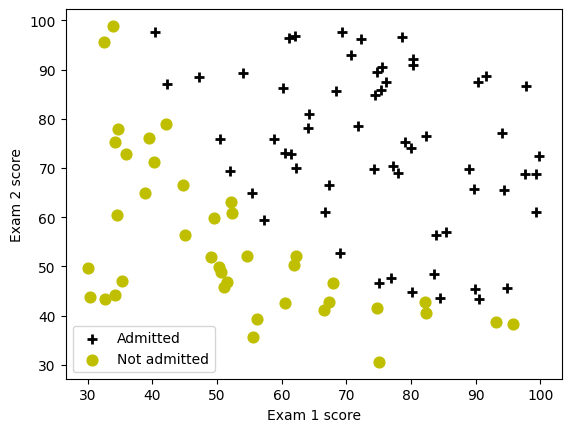

In [ ]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

Equation of a straight line would be a good start, it is doable.

**Step-3: Implement a Logistic Regression Model:**

*Step-3.1: Sigmoid Function:* Let's implement the Sigmoid function.

In [ ]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Let's test it:

In [ ]:
sigmoid(0)

0.5

*Step-3.2: Cost Function and Gradient:* Let's first implement a function to calculate the cost  $J$. This function will return the cost value.

In [ ]:
def costFunction(theta, X, y):
    m = y.size
    f = sigmoid(X.dot(theta))

    J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))

    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

Let's implement another function to get the gradient.

In [ ]:
def gradient(theta, X, y):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1,1)))

    grad =(1/m)*X.T.dot(f-y)

    return(grad.flatten())

Let's test our cost and gradient functions.

In [ ]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


*Step-3.3: Finding the Optimal $\theta$:* Next, train our model to get the optimal $\theta$ values. This will be done by minimizing the cost function. We will use the built-in minimization function in python.

In [ ]:
opt_theta = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})

<ipython-input-9-f903bef97870>:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))
<ipython-input-9-f903bef97870>:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))


Let's print the optimal values of $\theta$.

In [ ]:
print('Thetas: \n', opt_theta)

Thetas: 
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.20349770158950997
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 25
      jac: [-2.686e-09  4.364e-07 -1.397e-06]
 hess_inv: [[ 2.853e+03 -2.329e+01 -2.274e+01]
            [-2.329e+01  2.045e-01  1.730e-01]
            [-2.274e+01  1.730e-01  1.962e-01]]
     nfev: 33
     njev: 29


*Step-3.4: Build a Classification Model:* Let's implement a classification function that compares the probability of being in a class with some threshold and then returns the class label.

In [ ]:
def classify(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

Now, let's use the classify function and find the accuracy of our classification.

In [ ]:
p = classify(opt_theta.x, X)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


*Step-3.5: Plot the Decision Boundary:* Let's plot the decision boundary.

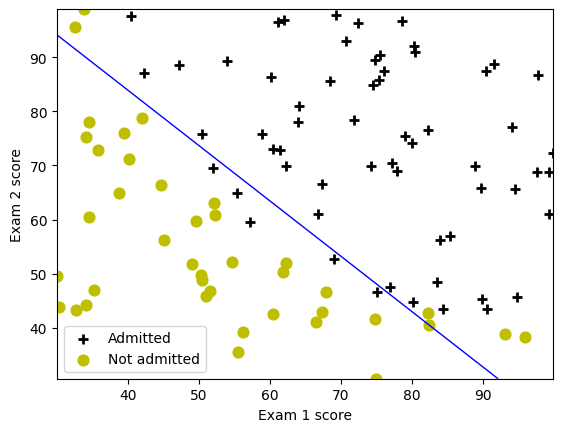

In [ ]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(opt_theta.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

**Built-in Logistic Regression Function:** Let's use the built-in function in python for logistic regression.

*1-Import Libraries:*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

*2-Train the Model:*

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

*3-Test the Model:*

In [ ]:
predictions = logisticRegr.predict(X)

*4-Evaluate the Model:*

In [ ]:
score = logisticRegr.score(X, y)
print(score)

0.89


**This is the same score we got using the model we developed from scratch!**

In [ ]:
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[34  6]
 [ 5 55]]


**Lab 2 start here**

**Dataset 2**

This question uses a dataset [Dataset-2] from microchip quality assurance tests. The dataset
indicates if a microchip is accepted or not based on the outcome of two tests

**Step-1: Import Libraries:**

The first step in any project is to import the libraries we are going to use. This step has already been done from the 1st section

**Step-2: Load the Data:**

The next step is to load the data. In this lab, the dataset is saved as .txt file (previous lab the data was saved as .csv file). Here, we will implement a function that helps us to load the data.


In [ ]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

Now we can load our data for this problem

Question 1(a) Load the data

In [ ]:
dataset2 = loaddata('Lab2_Dataset_2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


**Question 1 (b)**

Generating scatter plot

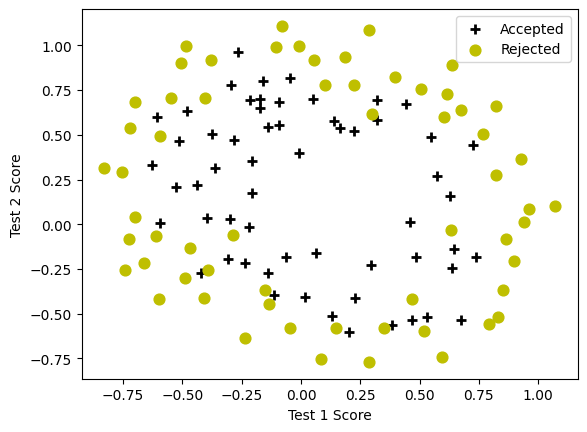

In [ ]:
plotData(dataset2,"Test 1 Score","Test 2 Score","Accepted","Rejected")

**Question 2**

No this dataset cannot be seperated into a positive or negative negative by a linear decision boundary

Due to the points having more circular pattern a linear decision boundary would not work here.

**Question 3**

Seperate the data into features and labels

In [ ]:
X = np.c_[dataset2[:,0:2]]
y = np.c_[dataset2[:,2]]

In [ ]:
print("X")
print(X.shape)
print("y")
print(y.shape)


X
(118, 2)
y
(118, 1)


**Question 4**

Use the PolynomialFeatures function in sklearn with degree = 6 to generate polynomial
and interaction features

In [ ]:
poly = PolynomialFeatures(6)
new_x = poly.fit_transform(X)

new_x.shape


(118, 28)

**Question 5**

Update the cost and gradient function from Lab 2 part 1 (step 3.2) to include a regularization term as in slide 20 and 21 of module 3

In [ ]:
def costFunction(theta, X, y, reg):
    m = y.size
    f = sigmoid(X.dot(theta))

    J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))+ (reg / (2 * m)) * np.sum(np.square(theta[1:]))

    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [ ]:
def gradient(theta, X, y, reg):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1,1)))

    grad =(1/m)*X.T.dot(f-y) +(reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]

    return(grad.flatten())

**Question 6**

Implement a function to find the model’s optimal coefficients.

In [ ]:
initial_theta=np.zeros(new_x.shape[1])
opt_theta_reg0 = minimize(costFunction, initial_theta, args=(new_x,y,0), method=None, jac=gradient, options={'maxiter':400})

In [ ]:
opt_theta_reg1 = minimize(costFunction, initial_theta, args=(new_x,y,1), method=None, jac=gradient, options={'maxiter':400})

In [ ]:
opt_theta_reg100 = minimize(costFunction, initial_theta, args=(new_x,y,100), method=None, jac=gradient, options={'maxiter':400})

**Question 6 (b)**

Find the optimal coefficients and plot the decision boundary for: (a) 𝜆=0, (b) 𝜆=1, and
(c) 𝜆=100.

**(a) 𝜆=0**
**Results**

This looks to be overfitting the model as it is going directly from point to point. There are some misclassifications for the not admitted. The contour is following the admitted very closely

<ipython-input-7-71a3b42dc05c>:2: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))


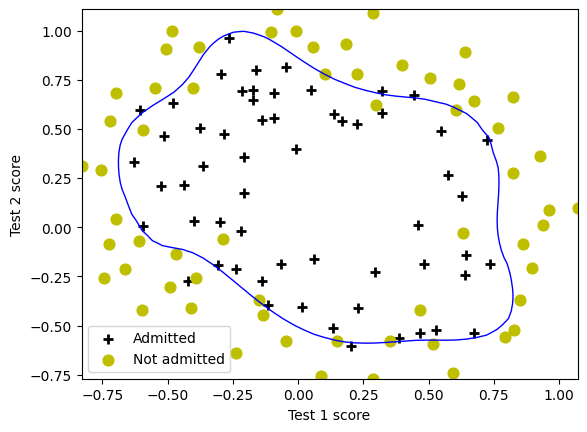

In [ ]:
plotData(dataset2, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = new_x[:,1].min(), new_x[:,1].max(),
x2_min, x2_max = new_x[:,2].min(), new_x[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta_reg0.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

**(b) 𝜆=1**
**Results**

This Lambda amount,1, looks to be generalizing very well. There is a nice combination between admitted and not admitted in the contour of the decision boundary. It is allowing for misclassification but that might work towards our advantage

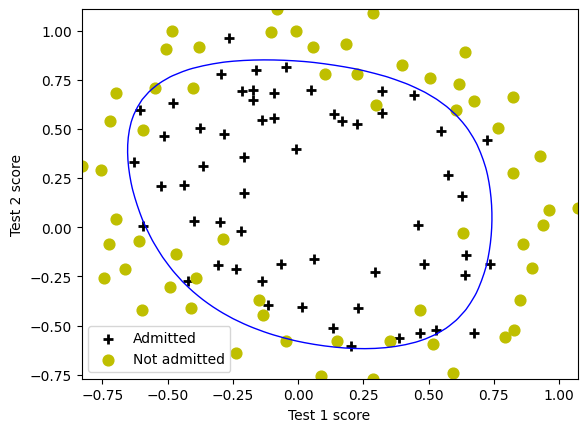

In [ ]:
plotData(dataset2, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = new_x[:,1].min(), new_x[:,1].max(),
x2_min, x2_max = new_x[:,2].min(), new_x[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta_reg1.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

**(c) 𝜆=100**
**Results**

This lambda,100, seems to be underfitting the model as it is misclassifying a good amount of them


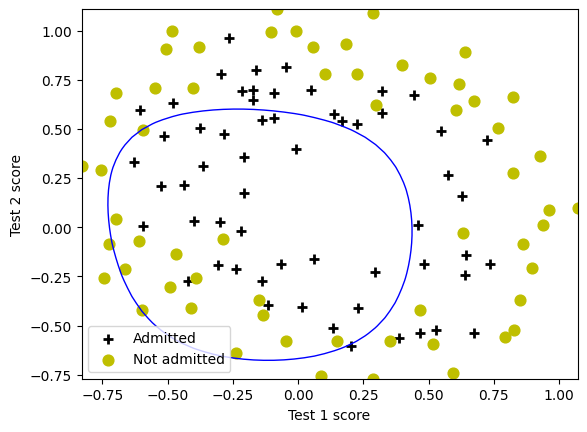

In [ ]:
plotData(dataset2, 'Test 1 score', 'Test 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = new_x[:,1].min(), new_x[:,1].max(),
x2_min, x2_max = new_x[:,2].min(), new_x[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta_reg100.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

**Question 7**

What is the best accuracy you got from the models you developed with (a) 𝜆=0, (b) 𝜆=1, and
(c) 𝜆=100

**(a) 𝜆=0**

**Best Accuracy**

But this one will more than likely overfit, while it is giving the best accuracy number we might not want this one

In [ ]:
q = classify(opt_theta_reg0.x, new_x)
print('Train accuracy {}%'.format(100*sum(q == y.ravel())/q.size))

Train accuracy 88.13559322033899%


**(b) 𝜆=1**

This is the accuracy I would use for the model, even though it is lower than the first one it is better at generalizing and is allowing for misclassification

In [ ]:
r = classify(opt_theta_reg1.x, new_x)
print('Train accuracy {}%'.format(100*sum(r == y.ravel())/r.size))

Train accuracy 83.05084745762711%


**(c) 𝜆=100**

In [ ]:
s = classify(opt_theta_reg100.x, new_x)
print('Train accuracy {}%'.format(100*sum(s == y.ravel())/s.size))

Train accuracy 61.016949152542374%
